<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/main/Sample%20Curve%20Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

df = pd.read_csv("go_track_trackspoints.csv")
df.head()



,id,latitude,longitude,track_id,time
0,1,-1.093934e+07,-3.706274e+07,1,2014-09-13 07:24:32
1,2,-1.093934e+07,-3.706274e+07,1,2014-09-13 07:24:37
2,3,-1.093932e+07,-3.706276e+07,1,2014-09-13 07:24:42
3,4,-1.093921e+07,-3.706284e+07,1,2014-09-13 07:24:47
4,5,-1.093894e+07,-3.706288e+07,1,2014-09-13 07:24:53


In [31]:
import math

def gps_to_cartesian(floatlatitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(floatlatitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)

    return x, y

# Apply the gps_to_cartesian function to each row of the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Display the modified DataFrame
df.head()


,id,latitude,longitude,track_id,time,x,y
0,1,-1.093934e+07,-3.706274e+07,1,2014-09-13 07:24:32,5.496096e+06,-2.232822e+06
1,2,-1.093934e+07,-3.706274e+07,1,2014-09-13 07:24:37,5.496096e+06,-2.232826e+06
2,3,-1.093932e+07,-3.706276e+07,1,2014-09-13 07:24:42,4.532269e+06,-4.455982e+06
3,4,-1.093921e+07,-3.706284e+07,1,2014-09-13 07:24:47,1.156167e+06,1.777247e+06
4,5,-1.093894e+07,-3.706288e+07,1,2014-09-13 07:24:53,-5.536932e+06,-2.170077e+06


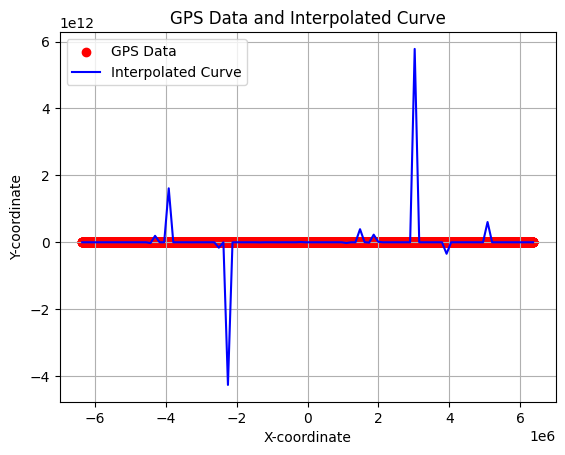

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming gps_data is a list of tuples (x, y) representing GPS coordinates
# Relative to the "home" location
gps_data = (df['x'], df['y'])  # Corrected tuple format

# Extract x and y coordinates from gps_data
x_coords, y_coords = gps_data

# Remove duplicate x coordinates
unique_indices = np.unique(x_coords, return_index=True)[1]
x_coords_unique = x_coords[unique_indices]
y_coords_unique = y_coords[unique_indices]

# Perform cubic spline interpolation
spline_func = interp1d(x_coords_unique, y_coords_unique, kind='cubic')

# Generate a set of interpolated points along the curve
interpolated_x = np.linspace(min(x_coords_unique), max(x_coords_unique), num=100)
interpolated_y = spline_func(interpolated_x)

# Plot the original GPS data points
plt.scatter(x_coords_unique, y_coords_unique, label='GPS Data', color='red')

# Plot the interpolated curve
plt.plot(interpolated_x, interpolated_y, label='Interpolated Curve', color='blue')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('GPS Data and Interpolated Curve')
plt.legend()
plt.grid(True)
plt.show()
